In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [7]:
def training_modelacc(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["GOAL","7MSHOT","6MSHOT","9MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model
def training_modelshot(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["GOAL","7MACC","6MACC","9MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model

Position:  CB.csv
Epoch 1/100
211/211 [==============================] - 1s 1ms/step - loss: 10.0611
Epoch 2/100
211/211 [==============================] - 0s 1ms/step - loss: 5.7376
Epoch 3/100
211/211 [==============================] - 0s 1ms/step - loss: 4.4760
Epoch 4/100
211/211 [==============================] - 0s 1ms/step - loss: 4.1816
Epoch 5/100
211/211 [==============================] - 0s 1ms/step - loss: 4.0023
Epoch 6/100
211/211 [==============================] - 0s 1ms/step - loss: 3.8514
Epoch 7/100
211/211 [==============================] - 0s 868us/step - loss: 3.7197
Epoch 8/100
211/211 [==============================] - 0s 917us/step - loss: 3.5869
Epoch 9/100
211/211 [==============================] - 0s 1ms/step - loss: 3.4636
Epoch 10/100
211/211 [==============================] - 0s 963us/step - loss: 3.3439
Epoch 11/100
211/211 [==============================] - 0s 1ms/step - loss: 3.2305
Epoch 12/100
211/211 [==============================] - 0s 1ms/step - l

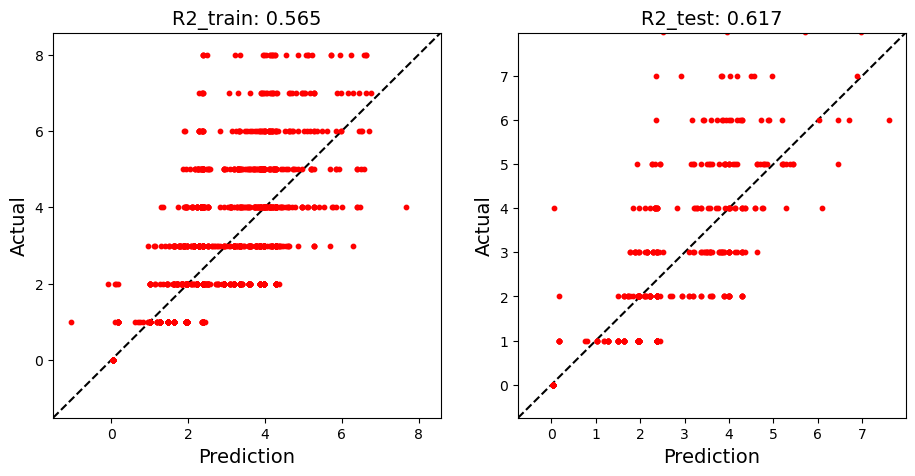


Position:  LB.csv
Epoch 1/100
223/223 [==============================] - 1s 1ms/step - loss: 6.8417
Epoch 2/100
223/223 [==============================] - 0s 1ms/step - loss: 5.0097
Epoch 3/100
223/223 [==============================] - 0s 948us/step - loss: 4.4803
Epoch 4/100
223/223 [==============================] - 0s 1ms/step - loss: 4.1415
Epoch 5/100
223/223 [==============================] - 0s 890us/step - loss: 3.8492
Epoch 6/100
223/223 [==============================] - 0s 970us/step - loss: 3.6341
Epoch 7/100
223/223 [==============================] - 0s 963us/step - loss: 3.4429
Epoch 8/100
223/223 [==============================] - 0s 1ms/step - loss: 3.2629
Epoch 9/100
223/223 [==============================] - 0s 1ms/step - loss: 3.1010
Epoch 10/100
223/223 [==============================] - 0s 1ms/step - loss: 2.9484
Epoch 11/100
223/223 [==============================] - 0s 1ms/step - loss: 2.8060
Epoch 12/100
223/223 [==============================] - 0s 1ms/step -

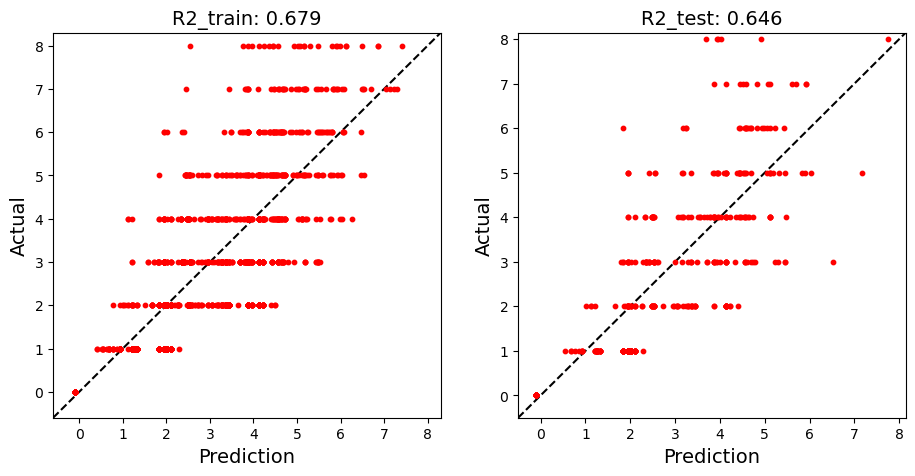


Position:  LW.csv
Epoch 1/100
167/167 [==============================] - 0s 1ms/step - loss: 10.8760
Epoch 2/100
167/167 [==============================] - 0s 1ms/step - loss: 8.4144
Epoch 3/100
167/167 [==============================] - 0s 1ms/step - loss: 7.0902
Epoch 4/100
167/167 [==============================] - 0s 1ms/step - loss: 6.2906
Epoch 5/100
167/167 [==============================] - 0s 1ms/step - loss: 5.6324
Epoch 6/100
167/167 [==============================] - 0s 1ms/step - loss: 5.0849
Epoch 7/100
167/167 [==============================] - 0s 1ms/step - loss: 4.6310
Epoch 8/100
167/167 [==============================] - 0s 1ms/step - loss: 4.2813
Epoch 9/100
167/167 [==============================] - 0s 1ms/step - loss: 3.9896
Epoch 10/100
167/167 [==============================] - 0s 996us/step - loss: 3.7526
Epoch 11/100
167/167 [==============================] - 0s 1ms/step - loss: 3.5252
Epoch 12/100
167/167 [==============================] - 0s 995us/step - lo

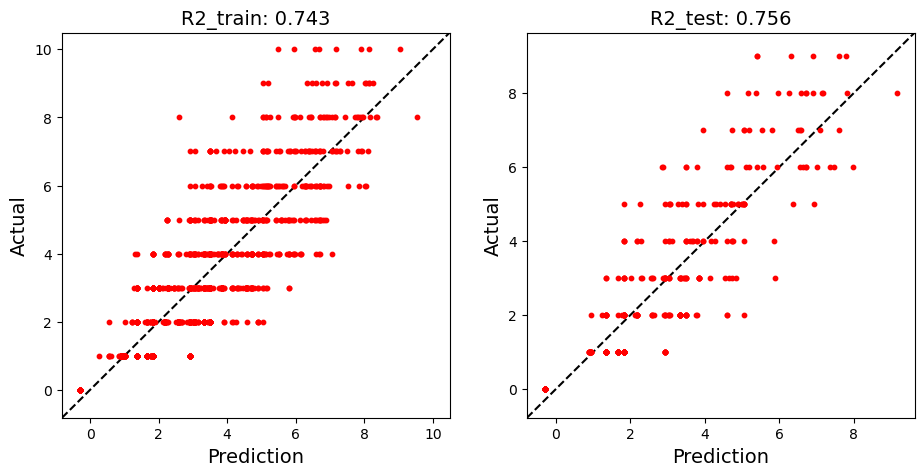


Position:  P.csv
Epoch 1/100
215/215 [==============================] - 1s 1000us/step - loss: 7.6010
Epoch 2/100
215/215 [==============================] - 0s 1ms/step - loss: 3.9659
Epoch 3/100
215/215 [==============================] - 0s 1ms/step - loss: 2.9047
Epoch 4/100
215/215 [==============================] - 0s 1ms/step - loss: 2.5817
Epoch 5/100
215/215 [==============================] - 0s 1ms/step - loss: 2.4173
Epoch 6/100
215/215 [==============================] - 0s 1ms/step - loss: 2.3472
Epoch 7/100
215/215 [==============================] - 0s 1ms/step - loss: 2.2984
Epoch 8/100
215/215 [==============================] - 0s 987us/step - loss: 2.2536
Epoch 9/100
215/215 [==============================] - 0s 1ms/step - loss: 2.2099
Epoch 10/100
215/215 [==============================] - 0s 990us/step - loss: 2.1679
Epoch 11/100
215/215 [==============================] - 0s 1ms/step - loss: 2.1298
Epoch 12/100
215/215 [==============================] - 0s 1ms/step - l

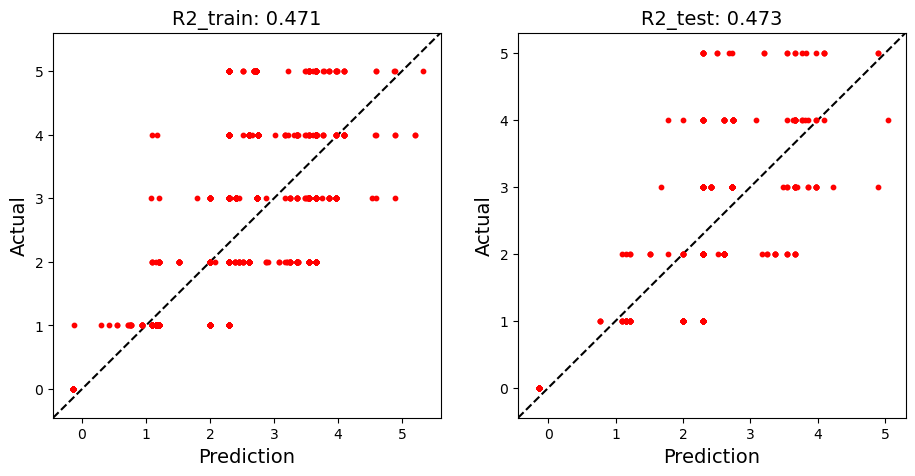


Position:  RB.csv
Epoch 1/100
184/184 [==============================] - 0s 1ms/step - loss: 13.0011
Epoch 2/100
184/184 [==============================] - 0s 910us/step - loss: 8.7395
Epoch 3/100
184/184 [==============================] - 0s 910us/step - loss: 6.9267
Epoch 4/100
184/184 [==============================] - 0s 869us/step - loss: 6.1211
Epoch 5/100
184/184 [==============================] - 0s 910us/step - loss: 5.5957
Epoch 6/100
184/184 [==============================] - 0s 1ms/step - loss: 5.1591
Epoch 7/100
184/184 [==============================] - 0s 997us/step - loss: 4.7575
Epoch 8/100
184/184 [==============================] - 0s 976us/step - loss: 4.3816
Epoch 9/100
184/184 [==============================] - 0s 1ms/step - loss: 4.0457
Epoch 10/100
184/184 [==============================] - 0s 981us/step - loss: 3.7434
Epoch 11/100
184/184 [==============================] - 0s 1ms/step - loss: 3.4678
Epoch 12/100
184/184 [==============================] - 0s 911

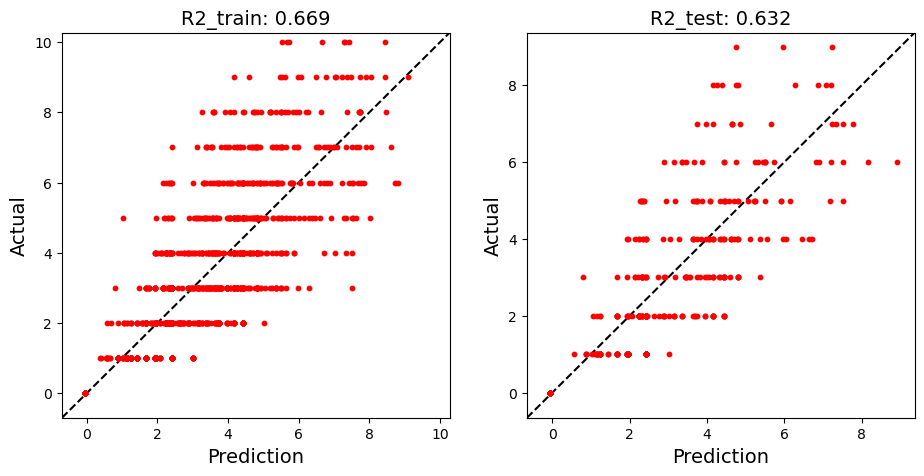


Position:  RW.csv
Epoch 1/100
167/167 [==============================] - 1s 974us/step - loss: 10.3335
Epoch 2/100
167/167 [==============================] - 0s 1ms/step - loss: 8.1444
Epoch 3/100
167/167 [==============================] - 0s 937us/step - loss: 7.1020
Epoch 4/100
167/167 [==============================] - 0s 985us/step - loss: 6.5954
Epoch 5/100
167/167 [==============================] - 0s 1ms/step - loss: 6.1608
Epoch 6/100
167/167 [==============================] - 0s 973us/step - loss: 5.7549
Epoch 7/100
167/167 [==============================] - 0s 999us/step - loss: 5.3418
Epoch 8/100
167/167 [==============================] - 0s 1ms/step - loss: 4.9478
Epoch 9/100
167/167 [==============================] - 0s 936us/step - loss: 4.5987
Epoch 10/100
167/167 [==============================] - 0s 962us/step - loss: 4.2787
Epoch 11/100
167/167 [==============================] - 0s 997us/step - loss: 4.0007
Epoch 12/100
167/167 [==============================] - 0s 1

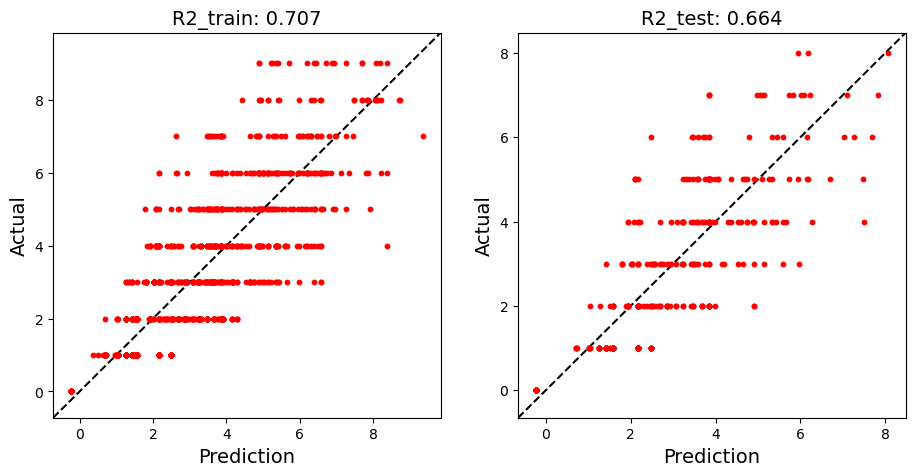

In [8]:
for i in os.listdir('dataiqrzero/'):
    print('Position: ', i.split(',')[0])
    training_modelacc('dataiqrzero/'+i)
    print('')

Position:  CB.csv
Epoch 1/100
211/211 [==============================] - 0s 917us/step - loss: 5.9272
Epoch 2/100
211/211 [==============================] - 0s 1ms/step - loss: 4.6847
Epoch 3/100
211/211 [==============================] - 0s 1ms/step - loss: 4.0745
Epoch 4/100
211/211 [==============================] - 0s 1ms/step - loss: 3.6383
Epoch 5/100
211/211 [==============================] - 0s 1ms/step - loss: 3.3588
Epoch 6/100
211/211 [==============================] - 0s 1ms/step - loss: 3.1682
Epoch 7/100
211/211 [==============================] - 0s 895us/step - loss: 3.0152
Epoch 8/100
211/211 [==============================] - 0s 900us/step - loss: 2.8875
Epoch 9/100
211/211 [==============================] - 0s 898us/step - loss: 2.7749
Epoch 10/100
211/211 [==============================] - 0s 1ms/step - loss: 2.6738
Epoch 11/100
211/211 [==============================] - 0s 1ms/step - loss: 2.5779
Epoch 12/100
211/211 [==============================] - 0s 1ms/step - 

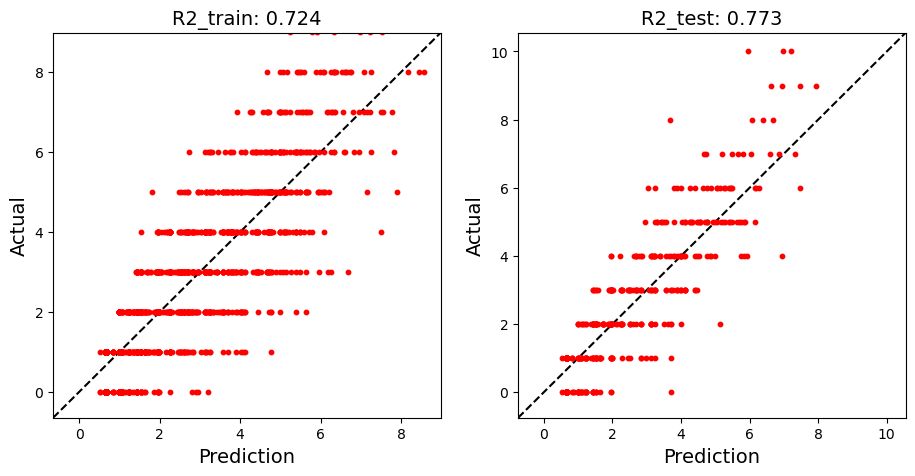


Position:  LB.csv
Epoch 1/100
223/223 [==============================] - 1s 1ms/step - loss: 10.2783
Epoch 2/100
223/223 [==============================] - 0s 978us/step - loss: 5.5862
Epoch 3/100
223/223 [==============================] - 0s 1ms/step - loss: 4.4611
Epoch 4/100
223/223 [==============================] - 0s 1ms/step - loss: 4.1190
Epoch 5/100
223/223 [==============================] - 0s 1ms/step - loss: 3.8871
Epoch 6/100
223/223 [==============================] - 0s 1ms/step - loss: 3.6830
Epoch 7/100
223/223 [==============================] - 0s 1ms/step - loss: 3.5049
Epoch 8/100
223/223 [==============================] - 0s 1ms/step - loss: 3.3560
Epoch 9/100
223/223 [==============================] - 0s 1ms/step - loss: 3.2159
Epoch 10/100
223/223 [==============================] - 0s 916us/step - loss: 3.0882
Epoch 11/100
223/223 [==============================] - 0s 925us/step - loss: 2.9681
Epoch 12/100
223/223 [==============================] - 0s 974us/step 

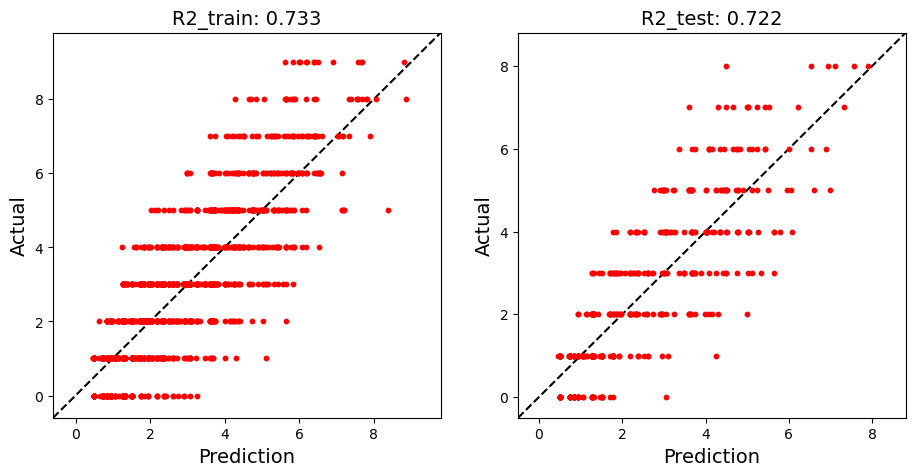


Position:  LW.csv
Epoch 1/100
167/167 [==============================] - 1s 1ms/step - loss: 11.2277
Epoch 2/100
167/167 [==============================] - 0s 985us/step - loss: 7.4810
Epoch 3/100
167/167 [==============================] - 0s 997us/step - loss: 5.9820
Epoch 4/100
167/167 [==============================] - 0s 1ms/step - loss: 5.4232
Epoch 5/100
167/167 [==============================] - 0s 997us/step - loss: 5.0736
Epoch 6/100
167/167 [==============================] - 0s 1ms/step - loss: 4.7904
Epoch 7/100
167/167 [==============================] - 0s 1ms/step - loss: 4.5424
Epoch 8/100
167/167 [==============================] - 0s 1ms/step - loss: 4.3292
Epoch 9/100
167/167 [==============================] - 0s 1ms/step - loss: 4.1365
Epoch 10/100
167/167 [==============================] - 0s 1ms/step - loss: 3.9631
Epoch 11/100
167/167 [==============================] - 0s 1ms/step - loss: 3.8180
Epoch 12/100
167/167 [==============================] - 0s 979us/step 

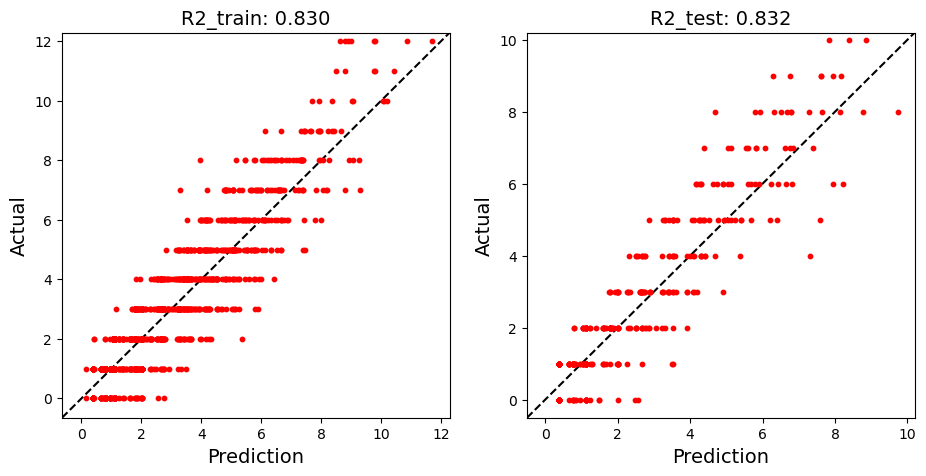


Position:  P.csv
Epoch 1/100
215/215 [==============================] - 1s 1ms/step - loss: 4.8446
Epoch 2/100
215/215 [==============================] - 0s 1ms/step - loss: 2.8629
Epoch 3/100
215/215 [==============================] - 0s 1ms/step - loss: 2.5720
Epoch 4/100
215/215 [==============================] - 0s 1ms/step - loss: 2.4266
Epoch 5/100
215/215 [==============================] - 0s 926us/step - loss: 2.3035
Epoch 6/100
215/215 [==============================] - 0s 993us/step - loss: 2.1904
Epoch 7/100
215/215 [==============================] - 0s 985us/step - loss: 2.0873
Epoch 8/100
215/215 [==============================] - 0s 1ms/step - loss: 1.9921
Epoch 9/100
215/215 [==============================] - 0s 1ms/step - loss: 1.9003
Epoch 10/100
215/215 [==============================] - 0s 1ms/step - loss: 1.8105
Epoch 11/100
215/215 [==============================] - 0s 988us/step - loss: 1.7287
Epoch 12/100
215/215 [==============================] - 0s 1ms/step - 

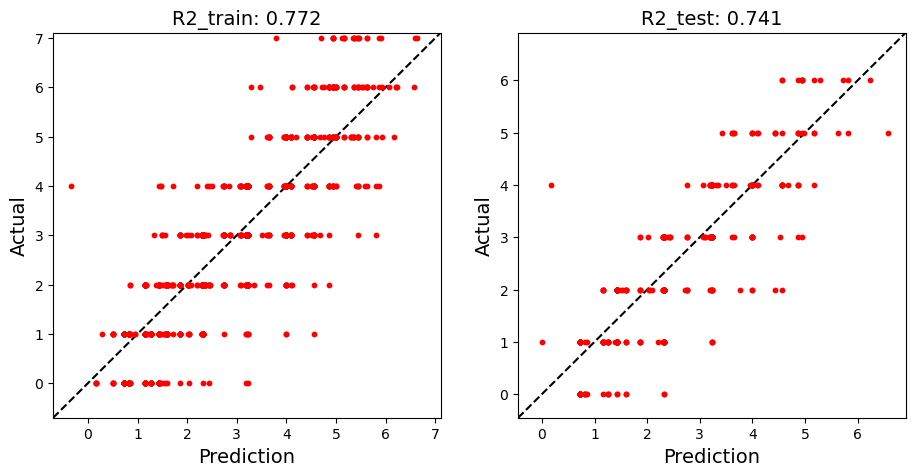


Position:  RB.csv
Epoch 1/100
184/184 [==============================] - 0s 977us/step - loss: 22.0198
Epoch 2/100
184/184 [==============================] - 0s 945us/step - loss: 13.2574
Epoch 3/100
184/184 [==============================] - 0s 942us/step - loss: 8.2850
Epoch 4/100
184/184 [==============================] - 0s 1ms/step - loss: 6.2654
Epoch 5/100
184/184 [==============================] - 0s 1ms/step - loss: 5.5504
Epoch 6/100
184/184 [==============================] - 0s 1ms/step - loss: 5.2409
Epoch 7/100
184/184 [==============================] - 0s 847us/step - loss: 5.0153
Epoch 8/100
184/184 [==============================] - 0s 937us/step - loss: 4.8272
Epoch 9/100
184/184 [==============================] - 0s 947us/step - loss: 4.6703
Epoch 10/100
184/184 [==============================] - 0s 1ms/step - loss: 4.5442
Epoch 11/100
184/184 [==============================] - 0s 960us/step - loss: 4.4252
Epoch 12/100
184/184 [==============================] - 0s 94

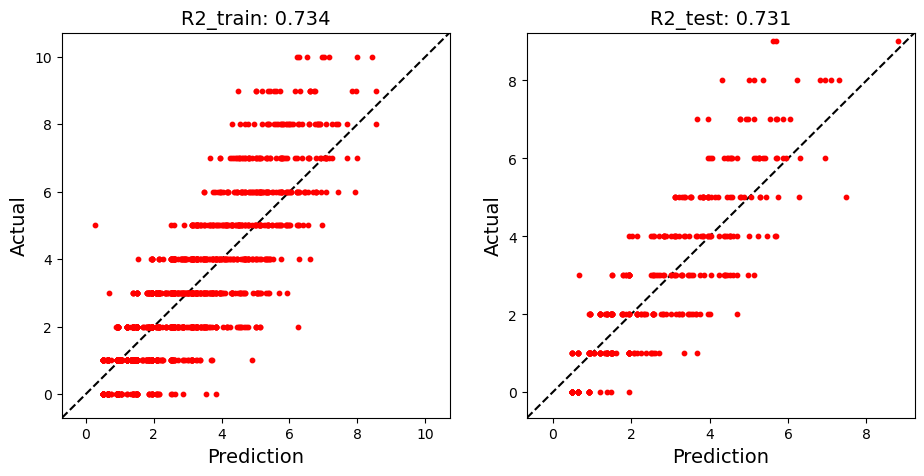


Position:  RW.csv
Epoch 1/100
167/167 [==============================] - 1s 1ms/step - loss: 6.6638
Epoch 2/100
167/167 [==============================] - 0s 1ms/step - loss: 6.2569
Epoch 3/100
167/167 [==============================] - 0s 992us/step - loss: 5.8489
Epoch 4/100
167/167 [==============================] - 0s 1ms/step - loss: 5.4729
Epoch 5/100
167/167 [==============================] - 0s 1ms/step - loss: 5.1337
Epoch 6/100
167/167 [==============================] - 0s 1ms/step - loss: 4.8513
Epoch 7/100
167/167 [==============================] - 0s 1ms/step - loss: 4.6270
Epoch 8/100
167/167 [==============================] - 0s 1ms/step - loss: 4.4487
Epoch 9/100
167/167 [==============================] - 0s 1ms/step - loss: 4.2868
Epoch 10/100
167/167 [==============================] - 0s 940us/step - loss: 4.1454
Epoch 11/100
167/167 [==============================] - 0s 1ms/step - loss: 4.0158
Epoch 12/100
167/167 [==============================] - 0s 959us/step - l

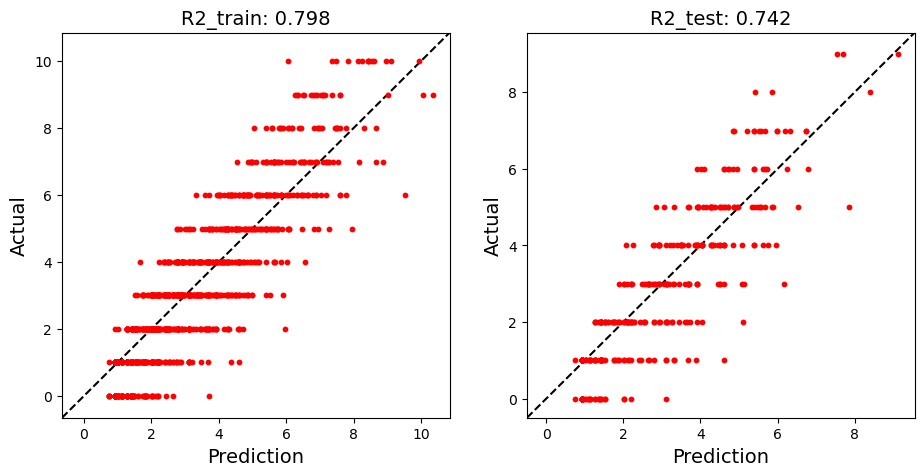

In [9]:
for i in os.listdir('dataiqrzero/'):
    print('Position: ', i.split(',')[0])
    training_modelshot('dataiqrzero/'+i)
    print('')